In [1]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import warnings

from utils.plot.utils import plot_second_order_phase_portrait, plot_second_order_phase_portrait_polar

plt.rcParams["figure.figsize"] = (20, 20)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# Chapter 7 - Limit Cycles

- A **limit cycle** is an isolated closed trajectory
	- i.e. nearby trajectories are not closed, they spiral towards/away
	- **Stable** if nearby trajectories spiral towards, **unstable** if they spiral away, **half-stable** if on one side they spiral towards and away on the other side
	- Important for physical phenomena, they model systems that have self-sustained oscillations

## Simple Example
Consider:
$\dot{r} = r(1 - r^2)$, $\dot{\theta} = 1$

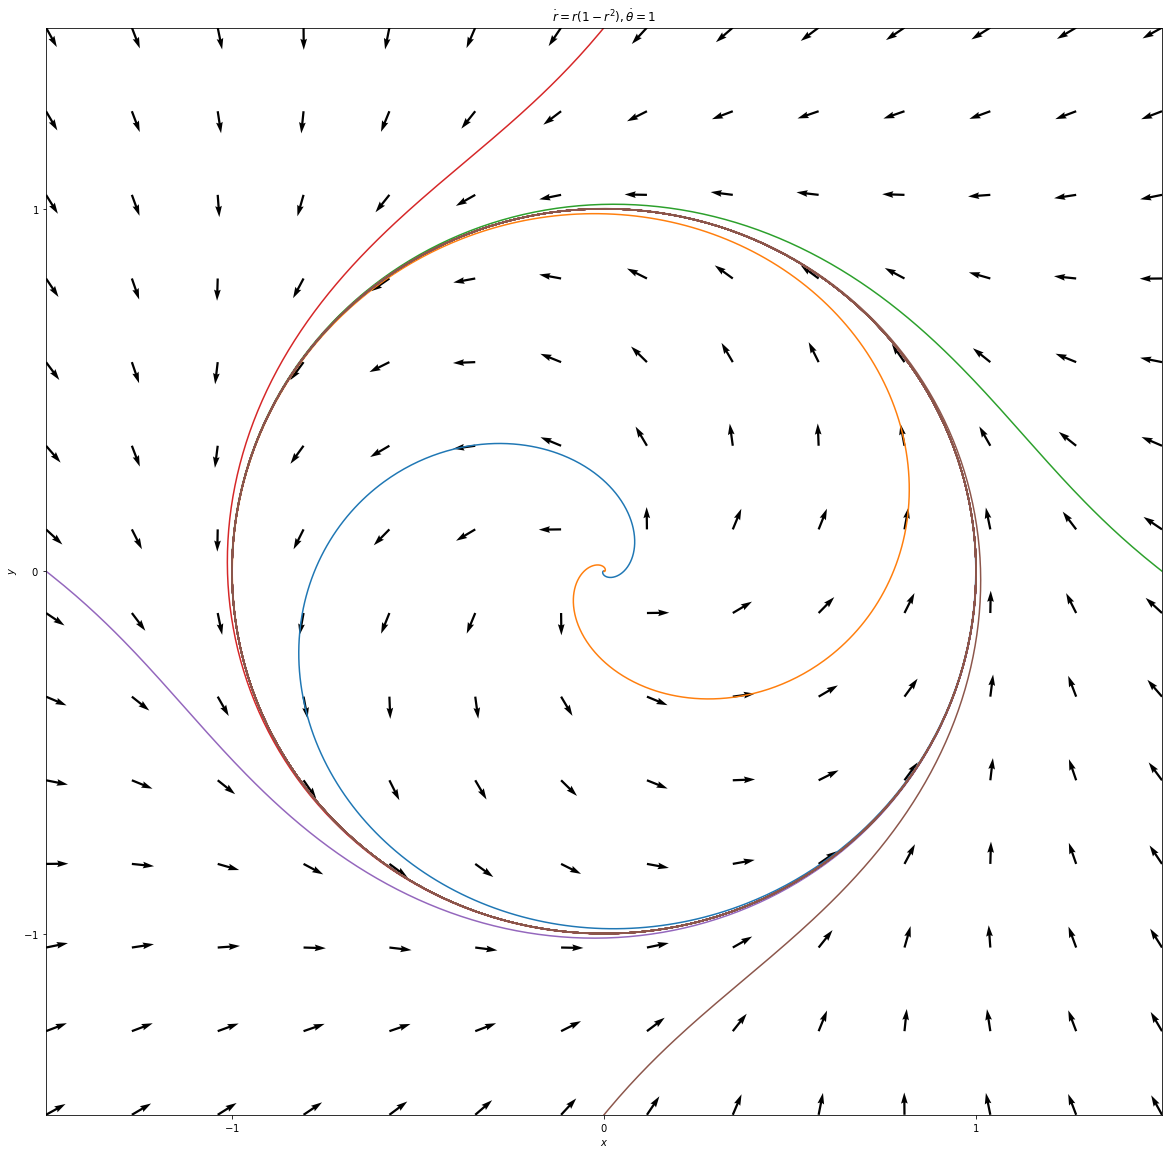

In [2]:
plot_second_order_phase_portrait_polar(lambda t, y: [y[0] * (1 - y[0] ** 2), 1], [[1e-4, 0], [1e-4, np.pi], [1.5, 0], [1.5, np.pi / 2], [1.5, np.pi], [1.5, 3 * np.pi / 2]], 1.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$\dot{r} = r(1-r^2), \dot{\\theta} = 1$")
plt.xticks([-1, 0, 1], ["$-1$", "$0$", "$1$"])
plt.yticks([-1, 0, 1], ["$-1$", "$0$", "$1$"])
plt.show()

## Exercises

### Exercise 7.1.3

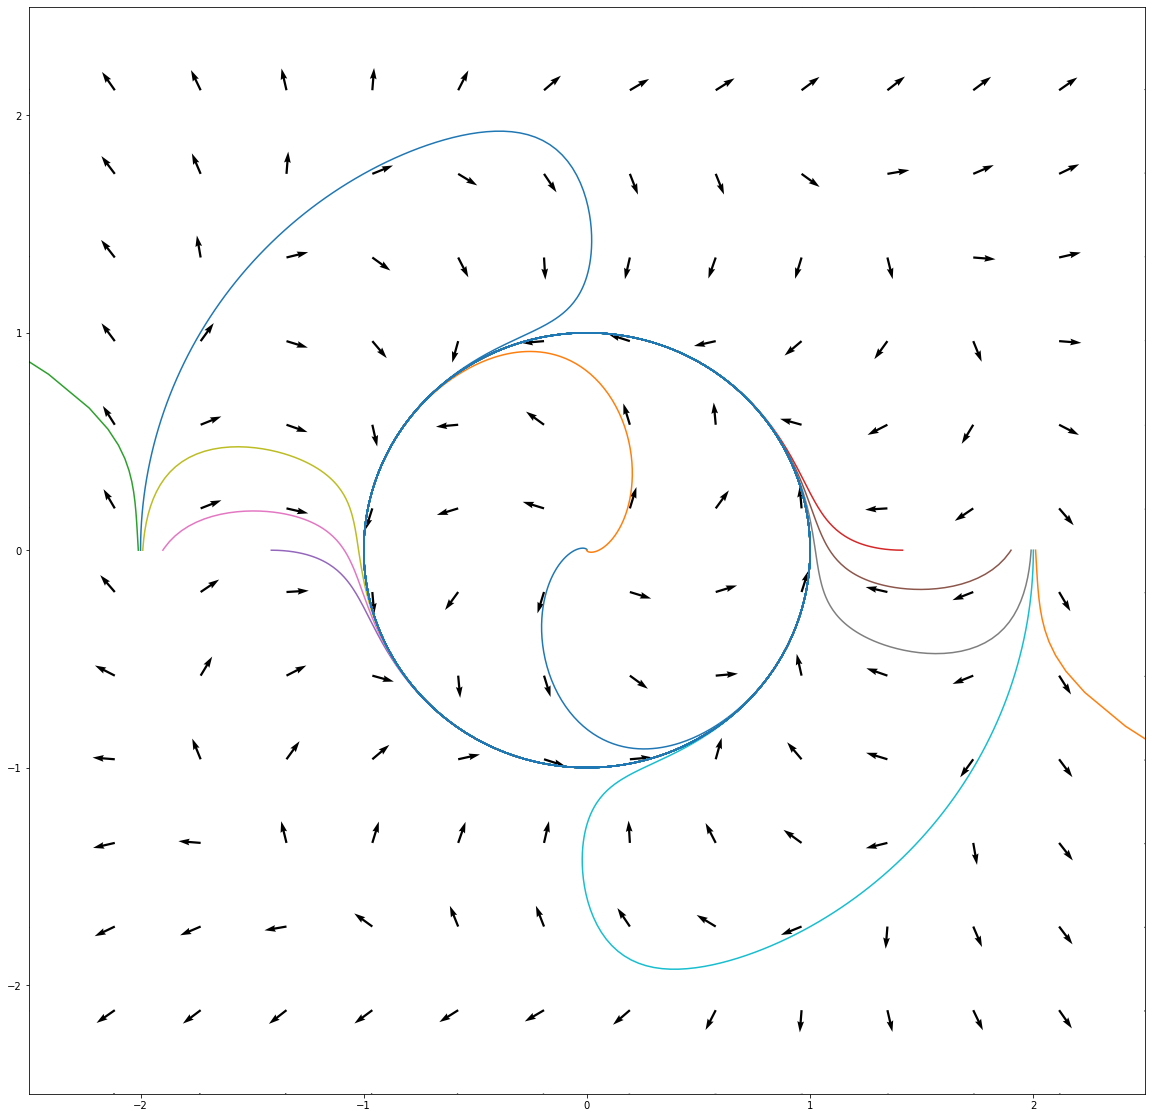

In [3]:
plot_second_order_phase_portrait_polar(lambda t, y: [y[0] * (1 - y[0] ** 2) * (4 - y[0] ** 2), 2 - y[0] ** 2], [
    [1e-4, 0],
    [1e-4, np.pi],
    [1, 0],
    [np.sqrt(2), 0],
    [np.sqrt(2), np.pi],
    [1.9, 0],
    [1.9, np.pi],
    [1.99, 0],
    [1.99, np.pi],
    [2, 0],
    [2, np.pi],
    [2.01, 0],
    [2.01, np.pi],
  ], 2.5)

### 7.2.19

$$
\dot{R} = -R + A_S + kSe^{-S}\\
\dot{S} = -S + A_R + kRe^{-R}
$$

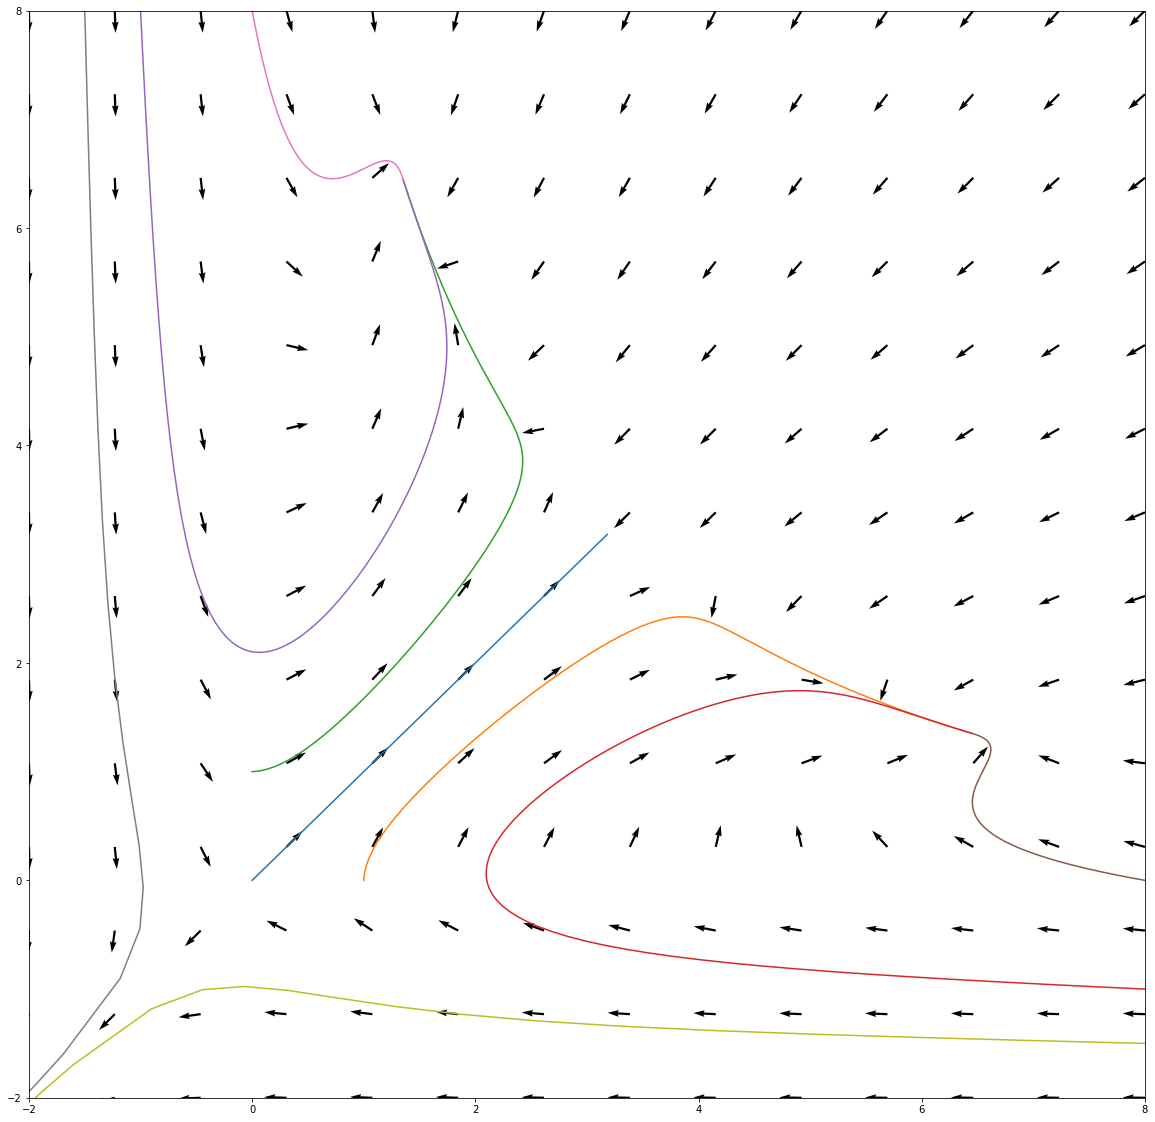

In [30]:
A_s = 1.2
A_r = 1.2
k = 15

with warnings.catch_warnings():
  warnings.simplefilter("ignore") # Exponential decay in bottom left causes overflow, not an issue here
  plot_second_order_phase_portrait(
    lambda t, y: [-y[0] + A_s + k * y[1] * np.exp(-y[1]), -y[1] + A_r + k * y[0] * np.exp(-y[0])],
    [[0, 0], [1, 0], [0, 1], [8, -1], [-1, 8], [8, 0], [0, 8], [-1.5, 8], [8, -1.5]],
    [[-2, 8], [-2, 8]]
  )

### 7.3.1 + 7.3.2

$$
\begin{align*}
  \dot{x} &= x - y - x(x^2 + 5y^2) \\
  \dot{y} &= x + y - y(x^2 + y^2)
\end{align*}
$$
In polar coordinates:
$$
\begin{align*}
  \dot{r} &= r - r^3 - r^3\sin^2(2\theta) \\
  \dot{\theta} &= 1 + 4r^2\cos\theta\sin^3\theta
\end{align*}
$$
All trajectories at $r = \frac{1}{\sqrt{2}}$ point outwards and all trajectories at $r = 1$ point inwards, as no fixed points lie in this region, the Poincaré-Bendixon theorem says that a limit cycle exists within this region

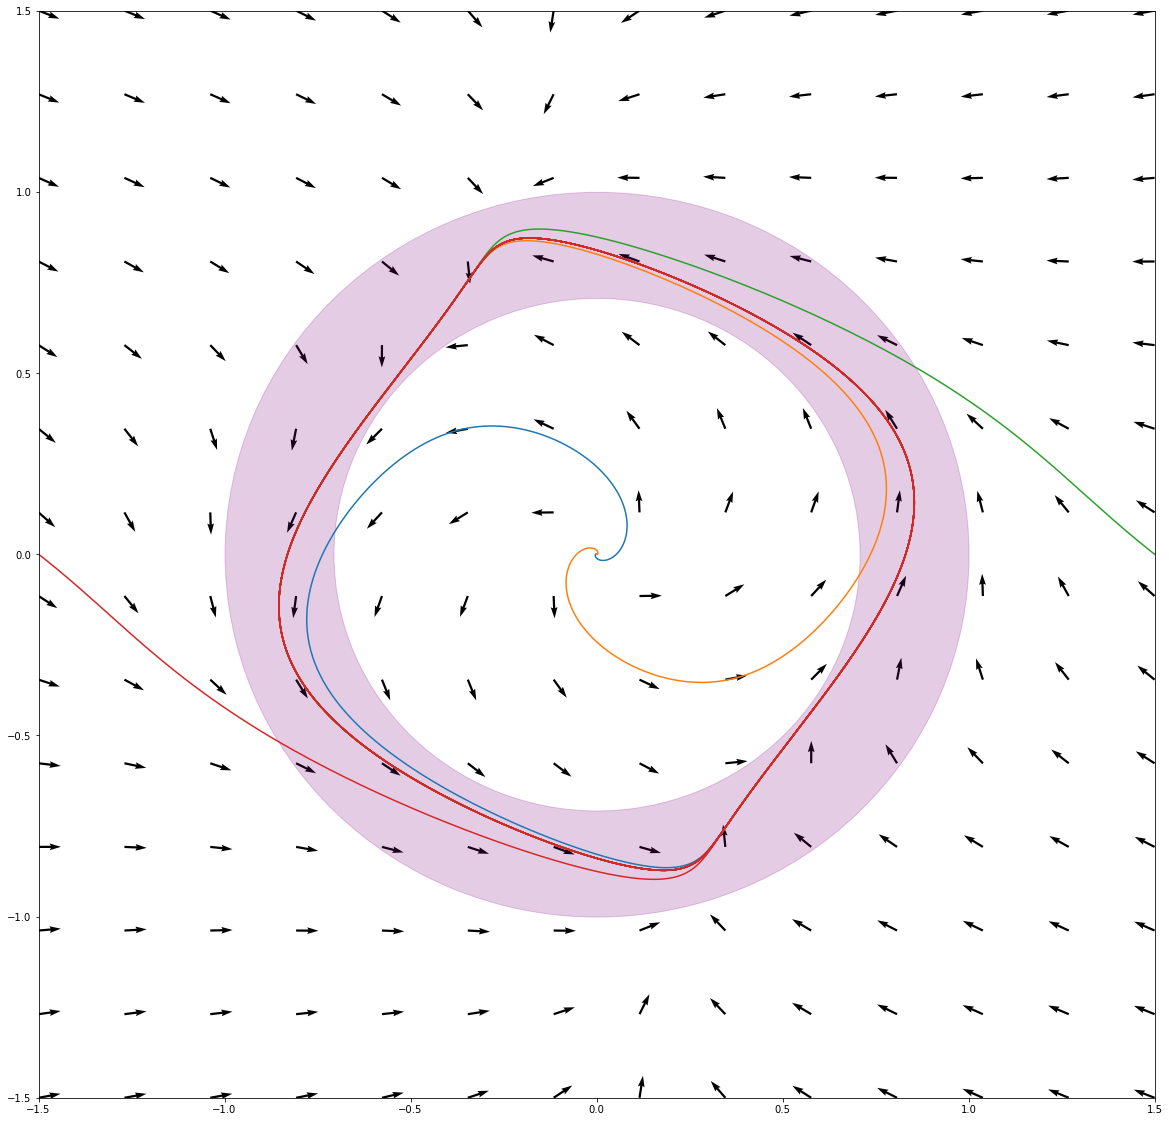

In [48]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Wedge


plot_second_order_phase_portrait(
  lambda t, y: [y[0] - y[1] - y[0] * (y[0]**2 + 5 * y[1]**2), y[0] + y[1] - y[1] * (y[0]**2 + y[1]**2)],
  [[1e-4, 0], [-1e-4, 0], [1.5, 0], [-1.5, 0]],
  [[-1.5, 1.5], [-1.5, 1.5]],
)

p = PatchCollection([Wedge((0, 0), 1, 0, 360, width=1 - 1/np.sqrt(2))])
p.set_alpha(0.2)
p.set_color("purple")
plt.gca().add_collection(p)
plt.show()